In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data= pd.read_csv("/content/sample_data/Medicare Monthly Enrollment Data_Oct2023.csv")

In [ ]:
data.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659.00,37613096.00,14812563.00,...,47620905.00,32831884.00,14789022.00,35679758.00,22661451.00,13018307.00,10000861.00,1030113.00,409204.00,24239580.00
1,2013,Year,State,AL,Alabama,Total,1.00,921477.00,711448.00,210029.00,...,857619.00,647647.00,209972.00,637247.00,437749.00,199498.00,205496.00,32790.00,11452.00,387510.00
2,2013,Year,County,AL,Alabama,Autauga,1001.00,9323.00,6484.00,2840.00,...,8708.00,5868.00,2840.00,6036.00,3268.00,2767.00,1839.00,296.00,105.00,3796.00
3,2013,Year,County,AL,Alabama,Baldwin,1003.00,41033.00,28775.00,12258.00,...,38559.00,26304.00,12255.00,27352.00,15593.00,11759.00,5276.00,867.00,379.00,20830.00
4,2013,Year,County,AL,Alabama,Barbour,1005.00,5847.00,5036.00,810.00,...,5456.00,4645.00,810.00,4170.00,3410.00,759.00,1783.00,304.00,73.00,2009.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466985 entries, 0 to 466984
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          466985 non-null  int64 
 1   MONTH                                         466985 non-null  object
 2   BENE_GEO_LVL                                  466985 non-null  object
 3   BENE_STATE_ABRVTN                             466985 non-null  object
 4   BENE_STATE_DESC                               466985 non-null  object
 5   BENE_COUNTY_DESC                              466985 non-null  object
 6   BENE_FIPS_CD                                  466985 non-null  object
 7   TOT_BENES                                     466985 non-null  object
 8   ORGNL_MDCR_BENES                              466985 non-null  object
 9   MA_AND_OTH_BENES                              466985 non-nu

##Exploratory Data Analysis & Data  Cleansing

#### We can see that data has total columns which creates correlation among the variables and there are some rows having the subtotals.

In [ ]:
data=data[data['BENE_COUNTY_DESC']!="Total"] ## Removing the rows containing totals

In [ ]:
data.head(20)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
2,2013,Year,County,AL,Alabama,Autauga,1001.00,9323.00,6484.00,2840.00,...,8708.00,5868.00,2840.00,6036.00,3268.00,2767.00,1839.00,296.00,105.00,3796.00
3,2013,Year,County,AL,Alabama,Baldwin,1003.00,41033.00,28775.00,12258.00,...,38559.00,26304.00,12255.00,27352.00,15593.00,11759.00,5276.00,867.00,379.00,20830.00
4,2013,Year,County,AL,Alabama,Barbour,1005.00,5847.00,5036.00,810.00,...,5456.00,4645.00,810.00,4170.00,3410.00,759.00,1783.00,304.00,73.00,2009.00
5,2013,Year,County,AL,Alabama,Bibb,1007.00,4574.00,2994.00,1580.00,...,4338.00,2759.00,1580.00,3359.00,1850.00,1509.00,1298.00,228.00,85.00,1749.00
6,2013,Year,County,AL,Alabama,Blount,1009.00,11183.00,6695.00,4488.00,...,10502.00,6014.00,4488.00,8479.00,4148.00,4331.00,2302.00,387.00,174.00,5616.00
7,2013,Year,County,AL,Alabama,Bullock,1011.00,1886.00,1434.00,452.00,...,1719.00,1267.00,452.00,1446.00,1006.00,440.00,738.00,133.00,23.00,552.00
8,2013,Year,County,AL,Alabama,Butler,1013.00,4576.00,4151.00,425.00,...,4336.00,3911.00,425.00,3428.00,3030.00,397.00,1394.00,226.00,70.00,1737.00
9,2013,Year,County,AL,Alabama,Calhoun,1015.00,25108.00,22073.00,3036.00,...,23187.00,20151.00,3036.00,15167.00,12254.00,2913.00,5648.00,899.00,299.00,8321.00
10,2013,Year,County,AL,Alabama,Chambers,1017.00,8335.00,7002.00,1333.00,...,7901.00,6568.00,1333.00,6027.00,4717.00,1310.00,2146.00,514.00,198.00,3169.00
11,2013,Year,County,AL,Alabama,Cherokee,1019.00,6408.00,4989.00,1419.00,...,6080.00,4662.00,1419.00,4708.00,3382.00,1326.00,1512.00,303.00,108.00,2785.00


In [ ]:
#data= data.drop(columns=['TOT_BENES','AGED_TOT_BENES','DSBLD_TOT_BENES','A_B_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES'])

In [ ]:
data=data.replace('*',0)
data.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
2,2013,Year,County,AL,Alabama,Autauga,1001.00,9323.00,6484.00,2840.00,...,8708.00,5868.00,2840.00,6036.00,3268.00,2767.00,1839.00,296.00,105.00,3796.00
3,2013,Year,County,AL,Alabama,Baldwin,1003.00,41033.00,28775.00,12258.00,...,38559.00,26304.00,12255.00,27352.00,15593.00,11759.00,5276.00,867.00,379.00,20830.00
4,2013,Year,County,AL,Alabama,Barbour,1005.00,5847.00,5036.00,810.00,...,5456.00,4645.00,810.00,4170.00,3410.00,759.00,1783.00,304.00,73.00,2009.00
5,2013,Year,County,AL,Alabama,Bibb,1007.00,4574.00,2994.00,1580.00,...,4338.00,2759.00,1580.00,3359.00,1850.00,1509.00,1298.00,228.00,85.00,1749.00
6,2013,Year,County,AL,Alabama,Blount,1009.00,11183.00,6695.00,4488.00,...,10502.00,6014.00,4488.00,8479.00,4148.00,4331.00,2302.00,387.00,174.00,5616.00


In [ ]:
print (data.isnull().sum())

YEAR                                            0
MONTH                                           0
BENE_GEO_LVL                                    0
BENE_STATE_ABRVTN                               0
BENE_STATE_DESC                                 0
BENE_COUNTY_DESC                                0
BENE_FIPS_CD                                    0
TOT_BENES                                       0
ORGNL_MDCR_BENES                                0
MA_AND_OTH_BENES                                0
AGED_TOT_BENES                                  0
AGED_ESRD_BENES                                 0
AGED_NO_ESRD_BENES                              0
DSBLD_TOT_BENES                                 0
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  0
DSBLD_NO_ESRD_BENES                             0
A_B_TOT_BENES                                   0
A_B_ORGNL_MDCR_BENES                            0
A_B_MA_AND_OTH_BENES                            0
PRSCRPTN_DRUG_TOT_BENES                         0


In [ ]:
data=data[data['BENE_COUNTY_DESC']!="Unknown"]
data.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
2,2013,Year,County,AL,Alabama,Autauga,1001.00,9323.00,6484.00,2840.00,...,8708.00,5868.00,2840.00,6036.00,3268.00,2767.00,1839.00,296.00,105.00,3796.00
3,2013,Year,County,AL,Alabama,Baldwin,1003.00,41033.00,28775.00,12258.00,...,38559.00,26304.00,12255.00,27352.00,15593.00,11759.00,5276.00,867.00,379.00,20830.00
4,2013,Year,County,AL,Alabama,Barbour,1005.00,5847.00,5036.00,810.00,...,5456.00,4645.00,810.00,4170.00,3410.00,759.00,1783.00,304.00,73.00,2009.00
5,2013,Year,County,AL,Alabama,Bibb,1007.00,4574.00,2994.00,1580.00,...,4338.00,2759.00,1580.00,3359.00,1850.00,1509.00,1298.00,228.00,85.00,1749.00
6,2013,Year,County,AL,Alabama,Blount,1009.00,11183.00,6695.00,4488.00,...,10502.00,6014.00,4488.00,8479.00,4148.00,4331.00,2302.00,387.00,174.00,5616.00


In [ ]:
data=data[(data['YEAR']>=2020) & (data['MONTH']!="Year")]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148326 entries, 306836 to 466981
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          148326 non-null  int64 
 1   MONTH                                         148326 non-null  object
 2   BENE_GEO_LVL                                  148326 non-null  object
 3   BENE_STATE_ABRVTN                             148326 non-null  object
 4   BENE_STATE_DESC                               148326 non-null  object
 5   BENE_COUNTY_DESC                              148326 non-null  object
 6   BENE_FIPS_CD                                  148326 non-null  object
 7   TOT_BENES                                     148326 non-null  object
 8   ORGNL_MDCR_BENES                              148326 non-null  object
 9   MA_AND_OTH_BENES                              148326 non-nu

In [ ]:
data=data.convert_dtypes()
data.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
306836,2020,January,County,AL,Alabama,Autauga,1001.00,11213.00,5613.00,5600.00,...,10387.00,4789.00,5598.00,7591.00,2134.00,5457.00,2037.00,362.00,115.00,5077.00
306837,2020,January,County,AL,Alabama,Baldwin,1003.00,55326.00,29109.00,26217.00,...,51734.00,25531.00,26203.00,40997.00,16034.00,24963.00,6268.00,1062.00,415.00,33252.00
306838,2020,January,County,AL,Alabama,Barbour,1005.00,6191.00,3103.00,3088.00,...,5828.00,2742.00,3086.00,4796.00,1830.00,2966.00,1883.00,234.00,79.00,2600.00
306839,2020,January,County,AL,Alabama,Bibb,1007.00,4747.00,2098.00,2649.00,...,4452.00,1803.00,2649.00,3624.00,1169.00,2455.00,1198.00,245.00,75.00,2106.00
306840,2020,January,County,AL,Alabama,Blount,1009.00,13132.00,5756.00,7376.00,...,12323.00,4949.00,7374.00,10421.00,3217.00,7204.00,2359.00,460.00,173.00,7429.00


In [ ]:
convert_dtype={'BENE_FIPS_CD':float,
               'TOT_BENES':float,
               'AGED_TOT_BENES':float,
               'DSBLD_TOT_BENES':float,
               'A_B_TOT_BENES':float,
               'PRSCRPTN_DRUG_TOT_BENES':float,
               'PRSCRPTN_DRUG_TOT_BENES':float,
               'ORGNL_MDCR_BENES':float,
               'MA_AND_OTH_BENES':float,
               'AGED_ESRD_BENES':float,
               'AGED_NO_ESRD_BENES':float,
               'DSBLD_ESRD_AND_ESRD_ONLY_BENES':float,
               'DSBLD_NO_ESRD_BENES':float,
               'A_B_ORGNL_MDCR_BENES':float,
               'A_B_MA_AND_OTH_BENES':float,
               'PRSCRPTN_DRUG_PDP_BENES':float,
               'PRSCRPTN_DRUG_MAPD_BENES':float,
               'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES':float,
               'PRSCRPTN_DRUG_FULL_LIS_BENES':float,
               'PRSCRPTN_DRUG_PARTIAL_LIS_BENES':float,
               'PRSCRPTN_DRUG_NO_LIS_BENES':float
               }


In [ ]:
data=data.astype(convert_dtype)
data.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
306836,2020,January,County,AL,Alabama,Autauga,1001.0,11213.0,5613.0,5600.0,...,10387.0,4789.0,5598.0,7591.0,2134.0,5457.0,2037.0,362.0,115.0,5077.0
306837,2020,January,County,AL,Alabama,Baldwin,1003.0,55326.0,29109.0,26217.0,...,51734.0,25531.0,26203.0,40997.0,16034.0,24963.0,6268.0,1062.0,415.0,33252.0
306838,2020,January,County,AL,Alabama,Barbour,1005.0,6191.0,3103.0,3088.0,...,5828.0,2742.0,3086.0,4796.0,1830.0,2966.0,1883.0,234.0,79.0,2600.0
306839,2020,January,County,AL,Alabama,Bibb,1007.0,4747.0,2098.0,2649.0,...,4452.0,1803.0,2649.0,3624.0,1169.0,2455.0,1198.0,245.0,75.0,2106.0
306840,2020,January,County,AL,Alabama,Blount,1009.0,13132.0,5756.0,7376.0,...,12323.0,4949.0,7374.0,10421.0,3217.0,7204.0,2359.0,460.0,173.0,7429.0


In [ ]:
print(data.dtypes)

YEAR                                                     Int64
MONTH                                           string[python]
BENE_GEO_LVL                                    string[python]
BENE_STATE_ABRVTN                               string[python]
BENE_STATE_DESC                                 string[python]
BENE_COUNTY_DESC                                string[python]
BENE_FIPS_CD                                           float64
TOT_BENES                                              float64
ORGNL_MDCR_BENES                                       float64
MA_AND_OTH_BENES                                       float64
AGED_TOT_BENES                                         float64
AGED_ESRD_BENES                                        float64
AGED_NO_ESRD_BENES                                     float64
DSBLD_TOT_BENES                                        float64
DSBLD_ESRD_AND_ESRD_ONLY_BENES                         float64
DSBLD_NO_ESRD_BENES                                    

In [ ]:
data.head(20)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
306836,2020,January,County,AL,Alabama,Autauga,1001.0,11213.0,5613.0,5600.0,...,10387.0,4789.0,5598.0,7591.0,2134.0,5457.0,2037.0,362.0,115.0,5077.0
306837,2020,January,County,AL,Alabama,Baldwin,1003.0,55326.0,29109.0,26217.0,...,51734.0,25531.0,26203.0,40997.0,16034.0,24963.0,6268.0,1062.0,415.0,33252.0
306838,2020,January,County,AL,Alabama,Barbour,1005.0,6191.0,3103.0,3088.0,...,5828.0,2742.0,3086.0,4796.0,1830.0,2966.0,1883.0,234.0,79.0,2600.0
306839,2020,January,County,AL,Alabama,Bibb,1007.0,4747.0,2098.0,2649.0,...,4452.0,1803.0,2649.0,3624.0,1169.0,2455.0,1198.0,245.0,75.0,2106.0
306840,2020,January,County,AL,Alabama,Blount,1009.0,13132.0,5756.0,7376.0,...,12323.0,4949.0,7374.0,10421.0,3217.0,7204.0,2359.0,460.0,173.0,7429.0
306841,2020,January,County,AL,Alabama,Bullock,1011.0,2274.0,1094.0,1180.0,...,2091.0,911.0,1180.0,1824.0,685.0,1139.0,866.0,125.0,33.0,800.0
306842,2020,January,County,AL,Alabama,Butler,1013.0,4975.0,3180.0,1795.0,...,4641.0,2848.0,1793.0,3822.0,2126.0,1696.0,1453.0,202.0,48.0,2119.0
306843,2020,January,County,AL,Alabama,Calhoun,1015.0,26949.0,17597.0,9352.0,...,24777.0,15426.0,9351.0,17301.0,8539.0,8762.0,5736.0,852.0,281.0,10432.0
306844,2020,January,County,AL,Alabama,Chambers,1017.0,8864.0,5134.0,3730.0,...,8289.0,4561.0,3728.0,6858.0,3220.0,3638.0,2178.0,571.0,131.0,3978.0
306845,2020,January,County,AL,Alabama,Cherokee,1019.0,7384.0,4345.0,3039.0,...,7016.0,3978.0,3038.0,5723.0,2977.0,2746.0,1575.0,304.0,122.0,3722.0


### Testing the normality of the data

<Axes: xlabel='PRSCRPTN_DRUG_FULL_LIS_BENES', ylabel='Count'>

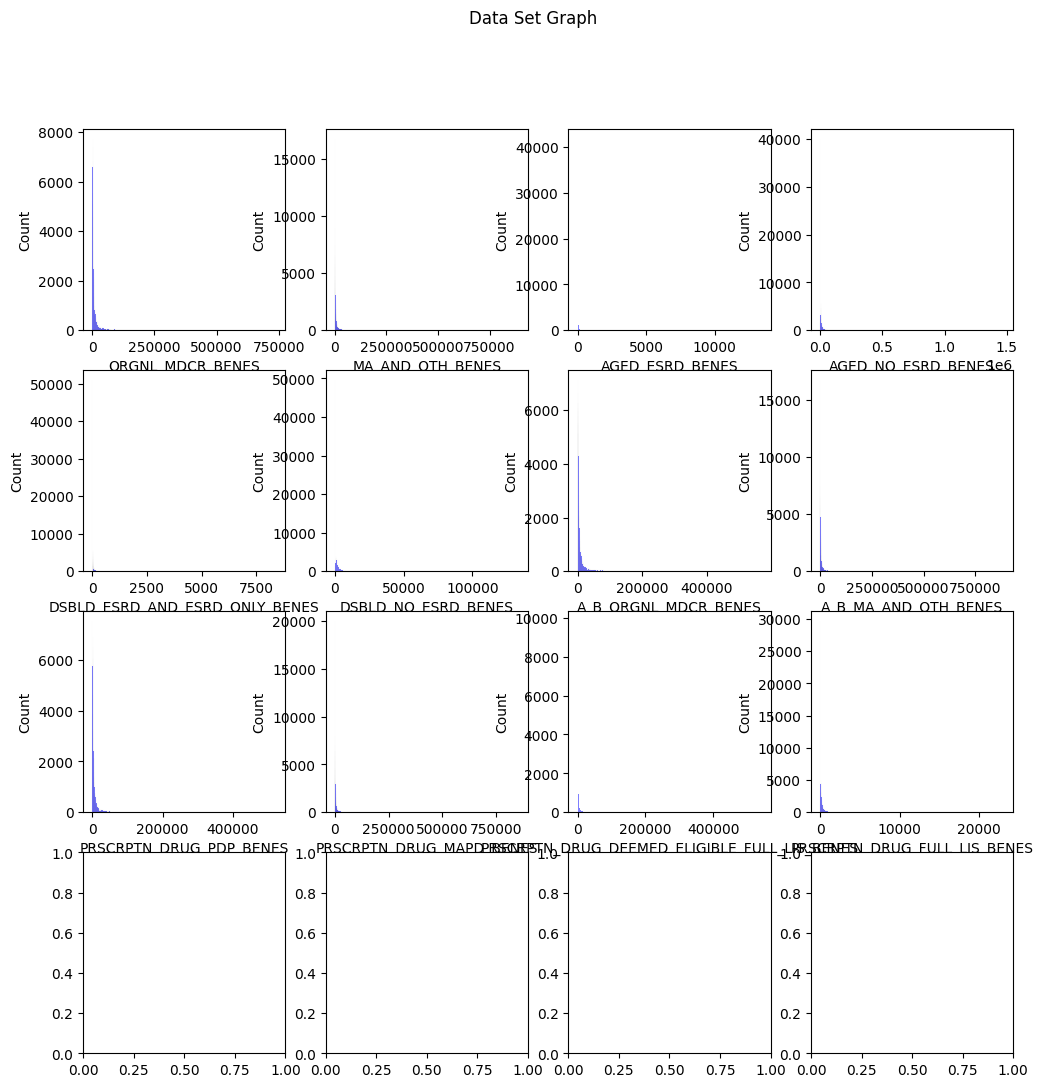

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(12,12))
plt.suptitle('Data Set Graph', fontsize=12)
sns.histplot(ax=axes[0,0], data=data['ORGNL_MDCR_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[0,1], data=data['MA_AND_OTH_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[0,2], data=data['AGED_ESRD_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[0,3], data=data['AGED_NO_ESRD_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1,0], data=data['DSBLD_ESRD_AND_ESRD_ONLY_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1,1], data=data['DSBLD_NO_ESRD_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1,2], data=data['A_B_ORGNL_MDCR_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1,3], data=data['A_B_MA_AND_OTH_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2,0], data=data['PRSCRPTN_DRUG_PDP_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2,1], data=data['PRSCRPTN_DRUG_MAPD_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2,2], data=data['PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2,3], data=data['PRSCRPTN_DRUG_FULL_LIS_BENES'], color='blue', alpha=0.5)


In [ ]:
data.skew(axis=0,skipna=True)

TypeError: Cannot perform reduction 'skew' with string dtype

In [ ]:
data.describe(include=["number"])

#### Observing the descriptive statistics we can see that there are some outliers from states like california, Florida , Newyork etc where the population is huge and also they are place to retire homes.


### Applying Transformation to reduce the skewness


In [ ]:
data1=data[(data['ORGNL_MDCR_BENES']<15000)]

In [ ]:
data1.describe(include="number")

In [ ]:
data1.skew(axis=0)

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(12,12))
plt.suptitle('Data Set Graph', fontsize=12)
sns.histplot(ax=axes[0,0], data=data1['ORGNL_MDCR_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[0,1], data=data1['MA_AND_OTH_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[0,2], data=data1['AGED_ESRD_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[0,3], data=data1['AGED_NO_ESRD_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1,0], data=data1['DSBLD_ESRD_AND_ESRD_ONLY_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1,1], data=data1['DSBLD_NO_ESRD_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1,2], data=data1['A_B_ORGNL_MDCR_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1,3], data=data1['A_B_MA_AND_OTH_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2,0], data=data1['PRSCRPTN_DRUG_PDP_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2,1], data=data1['PRSCRPTN_DRUG_MAPD_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2,2], data=data1['PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2,3], data=data1['PRSCRPTN_DRUG_FULL_LIS_BENES'], color='blue', alpha=0.5)


In [ ]:
data_transform=np.cbrt(data1['ORGNL_MDCR_BENES'])

In [ ]:
data_transform.skew()

In [ ]:
sns.histplot(data=data_transform, color='blue', alpha=0.5)

In [ ]:
data1.corr(method='spearman')

## Totals Data

In [ ]:
data_totals=data_whole[(data_whole['BENE_COUNTY_DESC']=="Total") & (data_whole['MONTH']=='Year') & ( data_whole['YEAR']>2020)]

NameError: name 'data_whole' is not defined

In [ ]:
data_totals= pd.DataFrame(data_totals,columns = ['YEAR', 'TOT_BENES','AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES'])

In [ ]:
data_totals.head(5)

In [ ]:
data_totals['TOT_BENES'] = pd.to_numeric(data_totals['TOT_BENES'], errors='coerce').fillna(0).astype(int)
data_totals['DSBLD_TOT_BENES'] = pd.to_numeric(data_totals['DSBLD_TOT_BENES'], errors='coerce').fillna(0).astype(int)
data_totals['AGED_TOT_BENES'] = pd.to_numeric(data_totals['AGED_TOT_BENES'], errors='coerce').fillna(0).astype(int)
data_totals['DSBLD_TOT_BENES'] = pd.to_numeric(data_totals['DSBLD_TOT_BENES'], errors='coerce').fillna(0).astype(int)
data_totals['PRSCRPTN_DRUG_TOT_BENES'] = pd.to_numeric(data_totals['PRSCRPTN_DRUG_TOT_BENES'], errors='coerce').fillna(0).astype(int)

In [ ]:
data_totals.describe(include="number")

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(15,5))
plt.suptitle('Data Set Graph', fontsize=12)
sns.histplot(ax=axes[0], data=data_totals['TOT_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1], data=data_totals['DSBLD_TOT_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2], data=data_totals['AGED_TOT_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[3], data=data_totals['DSBLD_TOT_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[4], data=data_totals['PRSCRPTN_DRUG_TOT_BENES'], color='blue', alpha=0.5)

In [ ]:
data_totals_transform=np.log10(data_totals['TOT_BENES'])

In [ ]:
data_totals_transform.skew()

In [ ]:
data_totals.corr(method="kendall")

## 2 Version

In [ ]:
data['TOT_BENES'] = pd.to_numeric(data['TOT_BENES'], errors='coerce').fillna(0).astype(int)
data['DSBLD_TOT_BENES'] = pd.to_numeric(data['DSBLD_TOT_BENES'], errors='coerce').fillna(0).astype(int)
data['AGED_TOT_BENES'] = pd.to_numeric(data['AGED_TOT_BENES'], errors='coerce').fillna(0).astype(int)
data['DSBLD_TOT_BENES'] = pd.to_numeric(data['DSBLD_TOT_BENES'], errors='coerce').fillna(0).astype(int)
data['PRSCRPTN_DRUG_TOT_BENES'] = pd.to_numeric(data['PRSCRPTN_DRUG_TOT_BENES'], errors='coerce').fillna(0).astype(int)

In [ ]:
data1=data[data['BENE_STATE_ABRVTN']=="PA"]
data1.describe(include="number")

,YEAR,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
count,3082.0,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,...,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000,3082.000000
mean,2021.434783,42067.000000,42177.453926,22029.980532,20147.473394,36783.859831,178.056457,36497.842310,5393.594095,116.522713,...,38616.896820,18479.219014,20137.677807,33817.087605,16077.936729,17739.150876,7424.260221,620.620701,256.171966,25515.747242
std,1.096658,38.684436,53011.509283,27539.092539,28079.930731,46227.343851,323.376883,46023.799818,7281.463207,235.756665,...,47678.917343,22472.162874,28063.296047,42895.259468,19708.886537,26117.239812,13281.646740,934.890624,307.465677,31256.791363
min,2020.0,42001.000000,1464.000000,699.000000,560.000000,1234.000000,0.000000,0.000000,187.000000,0.000000,...,1383.000000,620.000000,560.000000,1190.000000,575.000000,416.000000,278.000000,0.000000,0.000000,872.000000
25%,2020.0,42033.000000,10730.250000,5486.250000,4715.750000,9268.750000,35.000000,9231.750000,1463.750000,21.000000,...,10054.500000,4835.000000,4712.500000,8395.250000,4170.500000,3753.250000,1816.250000,157.000000,81.000000,6432.250000
50%,2021.0,42067.000000,21966.500000,11089.500000,11529.000000,18505.000000,77.000000,18436.000000,2820.000000,44.000000,...,20515.500000,9664.500000,11525.500000,17840.000000,8443.000000,9714.500000,3594.000000,369.500000,166.000000,13070.500000
75%,2022.0,42101.000000,52879.750000,25340.750000,27395.750000,44933.500000,206.750000,44718.750000,5985.500000,125.250000,...,48428.000000,21546.250000,27380.000000,41558.000000,19244.750000,22870.000000,8082.500000,733.000000,312.000000,32945.750000
max,2023.0,42133.000000,275781.000000,136574.000000,184264.000000,247026.000000,2492.000000,245890.000000,52791.000000,1875.000000,...,249937.000000,110184.000000,184133.000000,230814.000000,95195.000000,174108.000000,107038.000000,7047.000000,2520.000000,179674.000000


In [ ]:
data2=data[data['BENE_STATE_ABRVTN']=="TX"]
data2.describe(include="number")

,YEAR,TOT_BENES,AGED_TOT_BENES,DSBLD_TOT_BENES,PRSCRPTN_DRUG_TOT_BENES
count,35840.000000,3.584000e+04,3.584000e+04,35840.000000,3.584000e+04
mean,2017.892857,3.125532e+04,2.691912e+04,4334.121791,2.252582e+04
std,3.109238,2.543154e+05,2.195333e+05,35147.311073,1.843860e+05
min,2013.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2015.000000,1.243750e+03,1.101000e+03,140.000000,9.180000e+02
50%,2018.000000,3.741000e+03,3.207000e+03,524.000000,2.637000e+03
75%,2021.000000,1.020650e+04,8.678750e+03,1469.000000,7.355250e+03
max,2023.000000,4.647216e+06,4.140840e+06,589030.000000,3.581238e+06


In [ ]:
data3=data[(data['BENE_STATE_ABRVTN']=="PA") & (data['MONTH']!="Year")]
data3.describe(include="number")

,YEAR,TOT_BENES,AGED_TOT_BENES,DSBLD_TOT_BENES,PRSCRPTN_DRUG_TOT_BENES
count,8710.000000,8710.000000,8710.000000,8710.000000,8710.000000
mean,2017.923077,39849.021470,34084.463146,5764.558324,30764.875316
std,3.124810,50576.113019,43152.120457,7990.768844,39640.298634
min,2013.000000,1373.000000,1102.000000,187.000000,1068.000000
25%,2015.000000,10130.250000,8472.500000,1559.000000,7624.500000
50%,2018.000000,20613.000000,17536.500000,2904.500000,16107.000000
75%,2021.000000,49612.750000,41702.750000,6659.750000,37489.500000
max,2023.000000,275781.000000,247026.000000,58599.000000,230814.000000


In [ ]:
data3.head(20)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
5657,2013,January,County,PA,Pennsylvania,Adams,42001,20183,14353,5830,...,18531,12703,5828,13229,8035,5194,2126,317,206,10580
5658,2013,January,County,PA,Pennsylvania,Allegheny,42003,241548,92419,149129,...,219009,69897,149112,184699,49657,135042,38670,3554,2263,140212
5659,2013,January,County,PA,Pennsylvania,Armstrong,42005,15504,5968,9536,...,14654,5118,9536,12537,4023,8514,2813,233,206,9285
5660,2013,January,County,PA,Pennsylvania,Beaver,42007,39170,13909,25261,...,36137,10879,25258,29681,7131,22550,6353,491,480,22357
5661,2013,January,County,PA,Pennsylvania,Bedford,42009,11761,6069,5692,...,11052,5360,5692,8613,3904,4709,2002,180,194,6237
5662,2013,January,County,PA,Pennsylvania,Berks,42011,74109,48714,25395,...,68285,42890,25395,54158,32884,21274,11464,1074,664,40956
5663,2013,January,County,PA,Pennsylvania,Blair,42013,28594,14536,14058,...,26695,12638,14057,21477,9978,11499,5528,534,385,15030
5664,2013,January,County,PA,Pennsylvania,Bradford,42015,13599,10225,3374,...,12843,9469,3374,9695,7636,2059,2502,251,172,6770
5665,2013,January,County,PA,Pennsylvania,Bucks,42017,114986,78205,36781,...,102742,65964,36778,77628,48964,28664,11725,1150,714,64039
5666,2013,January,County,PA,Pennsylvania,Butler,42019,35227,15483,19744,...,32404,12662,19742,25143,7313,17830,4506,368,328,19941


NameError: name 'data_totals' is not defined

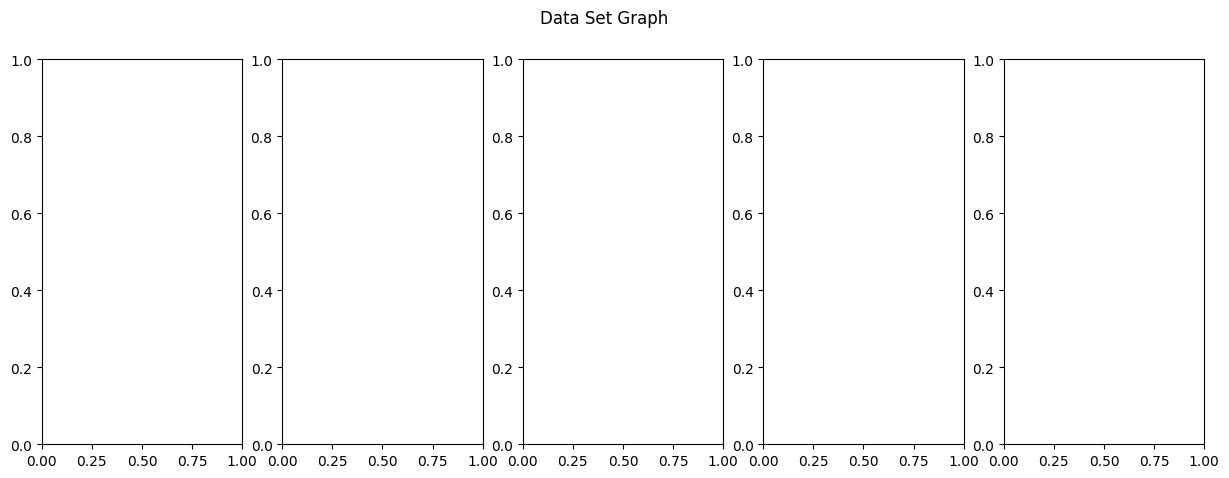

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(15,5))
plt.suptitle('Data Set Graph', fontsize=12)
sns.histplot(ax=axes[0], data=data_totals['TOT_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[1], data=data_totals['DSBLD_TOT_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[2], data=data_totals['AGED_TOT_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[3], data=data_totals['DSBLD_TOT_BENES'], color='blue', alpha=0.5)
sns.histplot(ax=axes[4], data=data_totals['PRSCRPTN_DRUG_TOT_BENES'], color='blue', alpha=0.5)

In [ ]:
data_totals_transform=np.log10(data_totals['TOT_BENES'])

In [ ]:
data_totals_transform.skew()

In [ ]:
data1= data1.drop(columns=['TOT_BENES','AGED_TOT_BENES','DSBLD_TOT_BENES','A_B_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES'])

In [ ]:
numeric_cols = data1.select_dtypes(include=['int64', 'float64'])

In [ ]:
correlation_matrix = numeric_cols.corr()
correlation_matrix

,YEAR,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,AGED_ESRD_BENES,AGED_NO_ESRD_BENES,DSBLD_TOT_BENES,DSBLD_ESRD_AND_ESRD_ONLY_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
YEAR,1.000000e+00,1.908643e-13,0.011414,-0.026117,0.047162,0.017925,-0.003587,0.018020,-0.030696,-0.018304,...,0.012936,-0.031247,0.046999,0.020771,-0.021850,0.050603,0.017255,-0.000406,-0.129075,0.022443
BENE_FIPS_CD,1.908643e-13,1.000000e+00,-0.101994,-0.075288,-0.118714,-0.109993,-0.027173,-0.111366,-0.044250,-0.006132,...,-0.101786,-0.067664,-0.118750,-0.100535,-0.067289,-0.114342,-0.005246,-0.015757,-0.060137,-0.134677
TOT_BENES,1.141433e-02,-1.019943e-01,1.000000,0.952175,0.954043,0.998573,0.906431,0.998350,0.940764,0.854972,...,0.999892,0.930048,0.954043,0.999382,0.923948,0.944157,0.852876,0.891870,0.923615,0.973344
ORGNL_MDCR_BENES,-2.611655e-02,-7.528846e-02,0.952175,1.000000,0.816852,0.953765,0.837394,0.953832,0.877049,0.801322,...,0.950918,0.997466,0.816851,0.943767,0.995254,0.799004,0.778180,0.832596,0.845832,0.931298
MA_AND_OTH_BENES,4.716239e-02,-1.187145e-01,0.954043,0.816852,1.000000,0.949789,0.889966,0.949303,0.915893,0.828196,...,0.955073,0.777564,1.000000,0.961123,0.768217,0.998839,0.846935,0.867184,0.914134,0.924194
AGED_TOT_BENES,1.792451e-02,-1.099927e-01,0.998573,0.953765,0.949789,1.000000,0.885812,0.999928,0.921313,0.828383,...,0.998545,0.932497,0.949794,0.997638,0.926866,0.939091,0.825523,0.867646,0.906518,0.983466
AGED_ESRD_BENES,-3.587366e-03,-2.717258e-02,0.906431,0.837394,0.889966,0.885812,1.000000,0.883995,0.975425,0.984982,...,0.903880,0.806458,0.889887,0.908282,0.800475,0.887709,0.981197,0.982717,0.927105,0.791042
AGED_NO_ESRD_BENES,1.802008e-02,-1.113661e-01,0.998350,0.953832,0.949303,0.999928,0.883995,1.000000,0.920146,0.826285,...,0.998368,0.932727,0.949308,0.997383,0.927096,0.938498,0.823498,0.866035,0.905803,0.984032
DSBLD_TOT_BENES,-3.069599e-02,-4.424955e-02,0.940764,0.877049,0.915893,0.921313,0.975425,0.920146,1.000000,0.965389,...,0.940155,0.850986,0.915861,0.942198,0.842319,0.911836,0.968279,0.984752,0.969077,0.842604
DSBLD_ESRD_AND_ESRD_ONLY_BENES,-1.830390e-02,-6.131804e-03,0.854972,0.801322,0.828196,0.828383,0.984982,0.826285,0.965389,1.000000,...,0.852295,0.774159,0.828109,0.856256,0.767524,0.827128,0.989959,0.985815,0.904875,0.716047


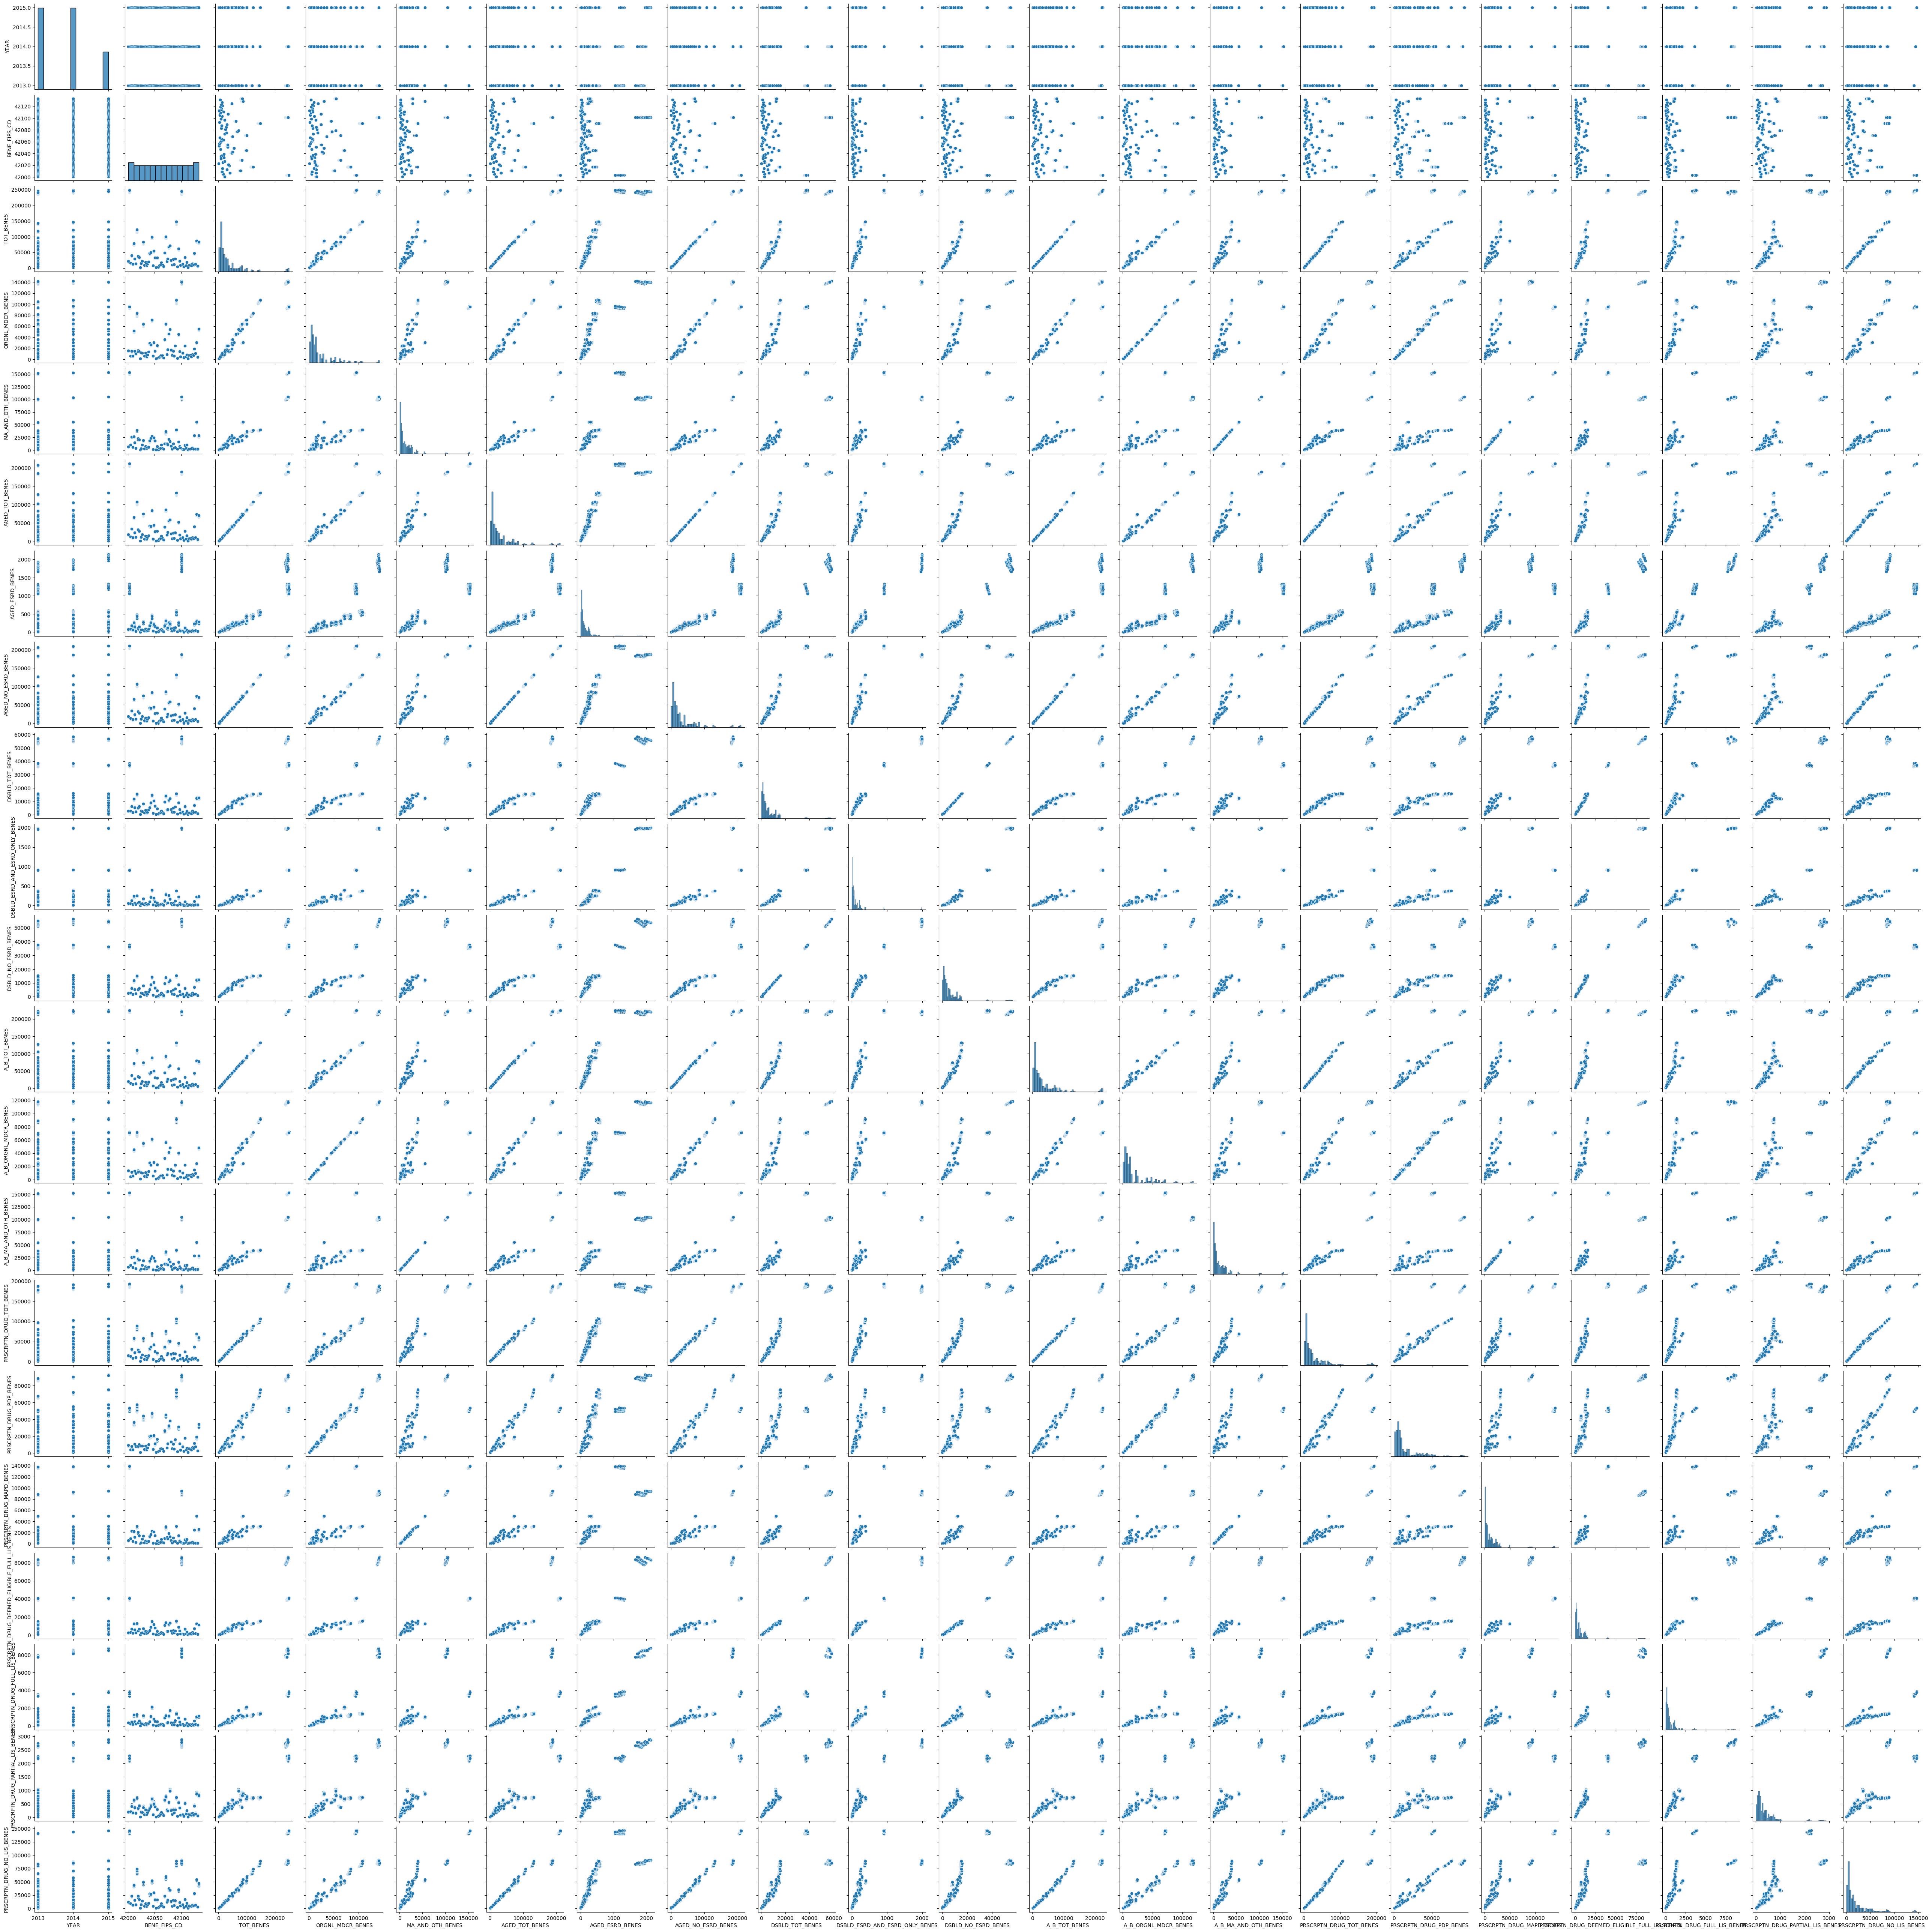

In [ ]:
sns.pairplot(data3)
plt.show()

In [ ]:
from sklearn.feature_selection import f_regression



# Split the DataFrame into independent and dependent variables
X = numeric_cols.drop(columns=['ORGNL_MDCR_BENES','YEAR'])  # Independent variables
y = data1['ORGNL_MDCR_BENES']  # Dependent variable

# Perform F-test
f_values, p_values = f_regression(X, y)

# Print results
print("F-values:", f_values) # larger F value is ideal
print("P-values:", p_values) #Low P value is ideal


F-values: [1.75580499e+01 2.99095666e+04 6.17610635e+03 3.10165144e+04
 7.22886191e+03 3.10647613e+04 1.02657038e+04 5.52615143e+03
 1.04946471e+04 2.90855694e+04 6.05440197e+05 6.17607381e+03
 2.50983309e+04 3.22200082e+05 5.43786760e+03 4.72862618e+03
 6.95964064e+03 7.74338869e+03 2.01330279e+04]
P-values: [2.86499998e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [ ]:
numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 352814 to 356403
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   YEAR                                          508 non-null    Int64  
 1   BENE_FIPS_CD                                  508 non-null    float64
 2   TOT_BENES                                     508 non-null    float64
 3   ORGNL_MDCR_BENES                              508 non-null    float64
 4   MA_AND_OTH_BENES                              508 non-null    float64
 5   AGED_TOT_BENES                                508 non-null    float64
 6   AGED_ESRD_BENES                               508 non-null    float64
 7   AGED_NO_ESRD_BENES                            508 non-null    float64
 8   DSBLD_TOT_BENES                               508 non-null    float64
 9   DSBLD_ESRD_AND_ESRD_ONLY_BENES                508 non-null    

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X contains independent variables and y contains the dependent variable
# X and y should be numpy arrays or pandas DataFrames

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)


# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", r2)


Mean Squared Error: 0.029060326307314425


NameError: name 'r2_score' is not defined

In [ ]:
import statsmodels.api as sm

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       ORGNL_MDCR_BENES   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.565e+26
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:35:05   Log-Likelihood:                 52264.
No. Observations:                3216   AIC:                        -1.045e+05
Df Residuals:                    3200   BIC:                        -1.044e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

####Dropping the non significant variables


In [ ]:
X = numeric_cols.drop(columns=['ORGNL_MDCR_BENES','YEAR','AGED_NO_ESRD_BENES','BENE_FIPS_CD','TOT_BENES'])  # Independent variables
y = data3['ORGNL_MDCR_BENES']  # Dependent variable

# Perform F-test
f_values, p_values = f_regression(X, y)

# Print results
print("F-values:", f_values)
print("P-values:", p_values)

F-values: [  3331.40149009  20925.84174415   6713.74355729   9157.47381036
   4646.27588931   9378.54155071  20239.37370333 593382.22150274
   3331.53417228  15380.95181489 220158.52031734   2922.66843978
   4893.28207168   5335.79607395   6806.10317748  10490.91231871]
P-values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import statsmodels.api as sm

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ORGNL_MDCR_BENES   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.759e+12
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:11:40   Log-Likelihood:                 878.24
No. Observations:                2144   AIC:                            -1722.
Df Residuals:                    2127   BIC:                            -1626.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

##### Checking for multicolinearity

In [ ]:
X = numeric_cols.drop(columns=['ORGNL_MDCR_BENES','YEAR','AGED_NO_ESRD_BENES','BENE_FIPS_CD','TOT_BENES','AGED_TOT_BENES','DSBLD_TOT_BENES','A_B_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES','PRSCRPTN_DRUG_FULL_LIS_BENES'])  # Independent variables
y = data1['ORGNL_MDCR_BENES']  # Dependent variable

# Perform F-test
f_values, p_values = f_regression(X, y)

# Print results
print("F-values:", f_values)
print("P-values:", p_values)

F-values: [  3331.40149009   6713.74355729   4646.27588931   9378.54155071
 593382.22150293   3331.53417228 220158.52031734   2922.66843978
   4893.28207168   6806.10317748  10490.91231871]
P-values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:


# Add a constant column to the independent variables
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ORGNL_MDCR_BENES   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.123e+05
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:10:45   Log-Likelihood:                -15854.
No. Observations:                2144   AIC:                         3.173e+04
Df Residuals:                    2132   BIC:                         3.180e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Filter data for California
#data1 = data1[data1['BENE_STATE_ABRVTN'] == "CA"]

# Assuming X contains your independent variables and y contains your dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model (using scaled features)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the model (using original y_test)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Mean Squared Error:", mse_tree)

# Interpretation (feature importance based on scaled features)
feature_importance_tree = dict(zip(X_train.columns, tree_model.feature_importances_))
print("Decision Tree Feature Importance:", feature_importance_tree)

Decision Tree Mean Squared Error: 15472.465153970827
Decision Tree Feature Importance: {'BENE_FIPS_CD': 0.015491832595289787, 'TOT_BENES': 8.451458393896894e-07, 'MA_AND_OTH_BENES': 6.8143099289191296e-06, 'AGED_TOT_BENES': 1.0207807213707108e-06, 'AGED_ESRD_BENES': 7.484060038087104e-05, 'AGED_NO_ESRD_BENES': 4.4770159666924207e-05, 'DSBLD_TOT_BENES': 8.731812849813449e-05, 'DSBLD_ESRD_AND_ESRD_ONLY_BENES': 0.0006030709029182621, 'DSBLD_NO_ESRD_BENES': 0.0018459372638519407, 'A_B_TOT_BENES': 0.13256812142417032, 'A_B_ORGNL_MDCR_BENES': 0.8214159583967523, 'A_B_MA_AND_OTH_BENES': 1.845499402288881e-05, 'PRSCRPTN_DRUG_TOT_BENES': 1.2020129890933718e-05, 'PRSCRPTN_DRUG_PDP_BENES': 0.0273943069317636, 'PRSCRPTN_DRUG_MAPD_BENES': 5.340622648395366e-06, 'PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES': 1.387330290088637e-05, 'PRSCRPTN_DRUG_FULL_LIS_BENES': 0.0002064831595653071, 'PRSCRPTN_DRUG_PARTIAL_LIS_BENES': 0.00020270742041829054, 'PRSCRPTN_DRUG_NO_LIS_BENES': 6.283730771743626e-06}


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=50, learning_rate=1.0, max_depth=13, random_state=80)

# Training the model
gb_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = gb_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8192.757257947587


In [ ]:
# Assuming X contains your independent variables and y contains your dependent variable
from sklearn.neural_network import MLPRegressor
#X = numeric_cols.drop(columns=['ORGNL_MDCR_BENES','YEAR'])  # Independent variables
#y = data2['ORGNL_MDCR_BENES']
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=42)

# Initialize the neural network model
model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', random_state=80)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred_nn = model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Neural Network Mean Squared Error:", mse_nn)

Neural Network Mean Squared Error: 127227.92953320526


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the kNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=2)

# Training the model
knn_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = knn_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 4552.403565640195
